In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.impute import KNNImputer

np.random.seed(109)

In [16]:
X_data = pd.read_csv('NHANESI_X.csv')
y_data = pd.read_csv('NHANESI_y.csv')

X_data = X_data.drop('Unnamed: 0', axis = 1)
y_data = y_data.drop('Unnamed: 0', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2,  random_state = 109, shuffle=True 
)

print(X_data.shape)
print(y_data.shape)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(9932, 18)
(9932, 1)
(7945, 18) (1987, 18)
(7945, 1) (1987, 1)


In [17]:
X_data.head()


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,35.0,92.0,126.0,2.0,77.7,12.0,5.0,165.0,135.0,1.37,7.6,2.0,142.0,323.0,41.8,5.8,31.109434,50.0
1,71.0,78.0,210.0,2.0,77.7,37.0,4.0,298.0,89.0,1.38,6.4,2.0,156.0,331.0,26.9,5.3,32.362572,78.0
2,74.0,86.0,999.0,2.0,77.7,31.0,3.8,222.0,115.0,1.37,7.4,2.0,170.0,299.0,38.5,8.1,25.388497,84.0
3,64.0,92.0,385.0,1.0,77.7,30.0,4.3,265.0,94.0,1.97,7.3,2.0,172.0,349.0,26.9,6.7,26.446610,80.0
4,32.0,70.0,183.0,2.0,77.7,18.0,5.0,203.0,192.0,1.35,7.3,1.0,128.0,386.0,49.7,8.1,20.354684,58.0


In [18]:
y_data.head()

,y
0,15.274658
1,11.586073
2,8.149087
3,-21.094292
4,-0.000000


In [19]:
print("X_data # of null values for each predictor:")
print(X_data[X_data.isnull().any(axis=1)].count())
print("\ny_data # of null values for the prediction:")
print(y_data[y_data.isnull().any(axis=1)].count())

print(X_data.columns)
print(y_data.columns)



X_data # of null values for each predictor:
Age                   1339
Diastolic BP          1281
Poverty index         1339
Race                  1339
Red blood cells       1339
Sedimentation rate     513
Serum Albumin         1339
Serum Cholesterol     1339
Serum Iron            1339
Serum Magnesium       1339
Serum Protein         1339
Sex                   1339
Systolic BP           1282
TIBC                  1339
TS                    1339
White blood cells      298
BMI                   1339
Pulse pressure        1280
dtype: int64

y_data # of null values for the prediction:
y    0
dtype: int64
Index(['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure'],
      dtype='object')
Index(['y'], dtype='object')


In [20]:
#X_data_dropped = X_data.dropna()
#y_data_dropped = y_data.dropna()
combined = pd.concat([X_data, y_data], axis = 1)
print(combined.shape)

combined_dropped = combined.dropna()

print(combined_dropped.shape)

X_data_dropped = combined_dropped[['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure']]
y_data_dropped = combined_dropped[['y']]

print(X_data_dropped.shape)
print(y_data_dropped.shape)


#knn imputer.fit
#choose number of transmitter


(9932, 19)
(8593, 19)
(8593, 18)
(8593, 1)


In [21]:
# impute X_data with KNN imputer, n_neighbors = 1

imputer = KNNImputer(n_neighbors=1)
imputer_result = imputer.fit_transform(X_data)

# print(imputer_result)
# print(type(imputer_result))

# turn it into a dataframe, rename columns
X_data_imputed = pd.DataFrame(imputer_result, columns = X_data.columns)
X_data_imputed.head()

,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,35.0,92.0,126.0,2.0,77.7,12.0,5.0,165.0,135.0,1.37,7.6,2.0,142.0,323.0,41.8,5.8,31.109434,50.0
1,71.0,78.0,210.0,2.0,77.7,37.0,4.0,298.0,89.0,1.38,6.4,2.0,156.0,331.0,26.9,5.3,32.362572,78.0
2,74.0,86.0,999.0,2.0,77.7,31.0,3.8,222.0,115.0,1.37,7.4,2.0,170.0,299.0,38.5,8.1,25.388497,84.0
3,64.0,92.0,385.0,1.0,77.7,30.0,4.3,265.0,94.0,1.97,7.3,2.0,172.0,349.0,26.9,6.7,26.446610,80.0
4,32.0,70.0,183.0,2.0,77.7,18.0,5.0,203.0,192.0,1.35,7.3,1.0,128.0,386.0,49.7,8.1,20.354684,58.0


In [22]:
X_data_imputed.columns

Index(['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure'],
      dtype='object')

In [23]:
# looking at which variables are categorical

# pd.unique(X_data_imputed["Red blood cells"])
# pd.unique(X_data_imputed["Age"])
# pd.unique(X_data_imputed["Race"])

# race and sex only?

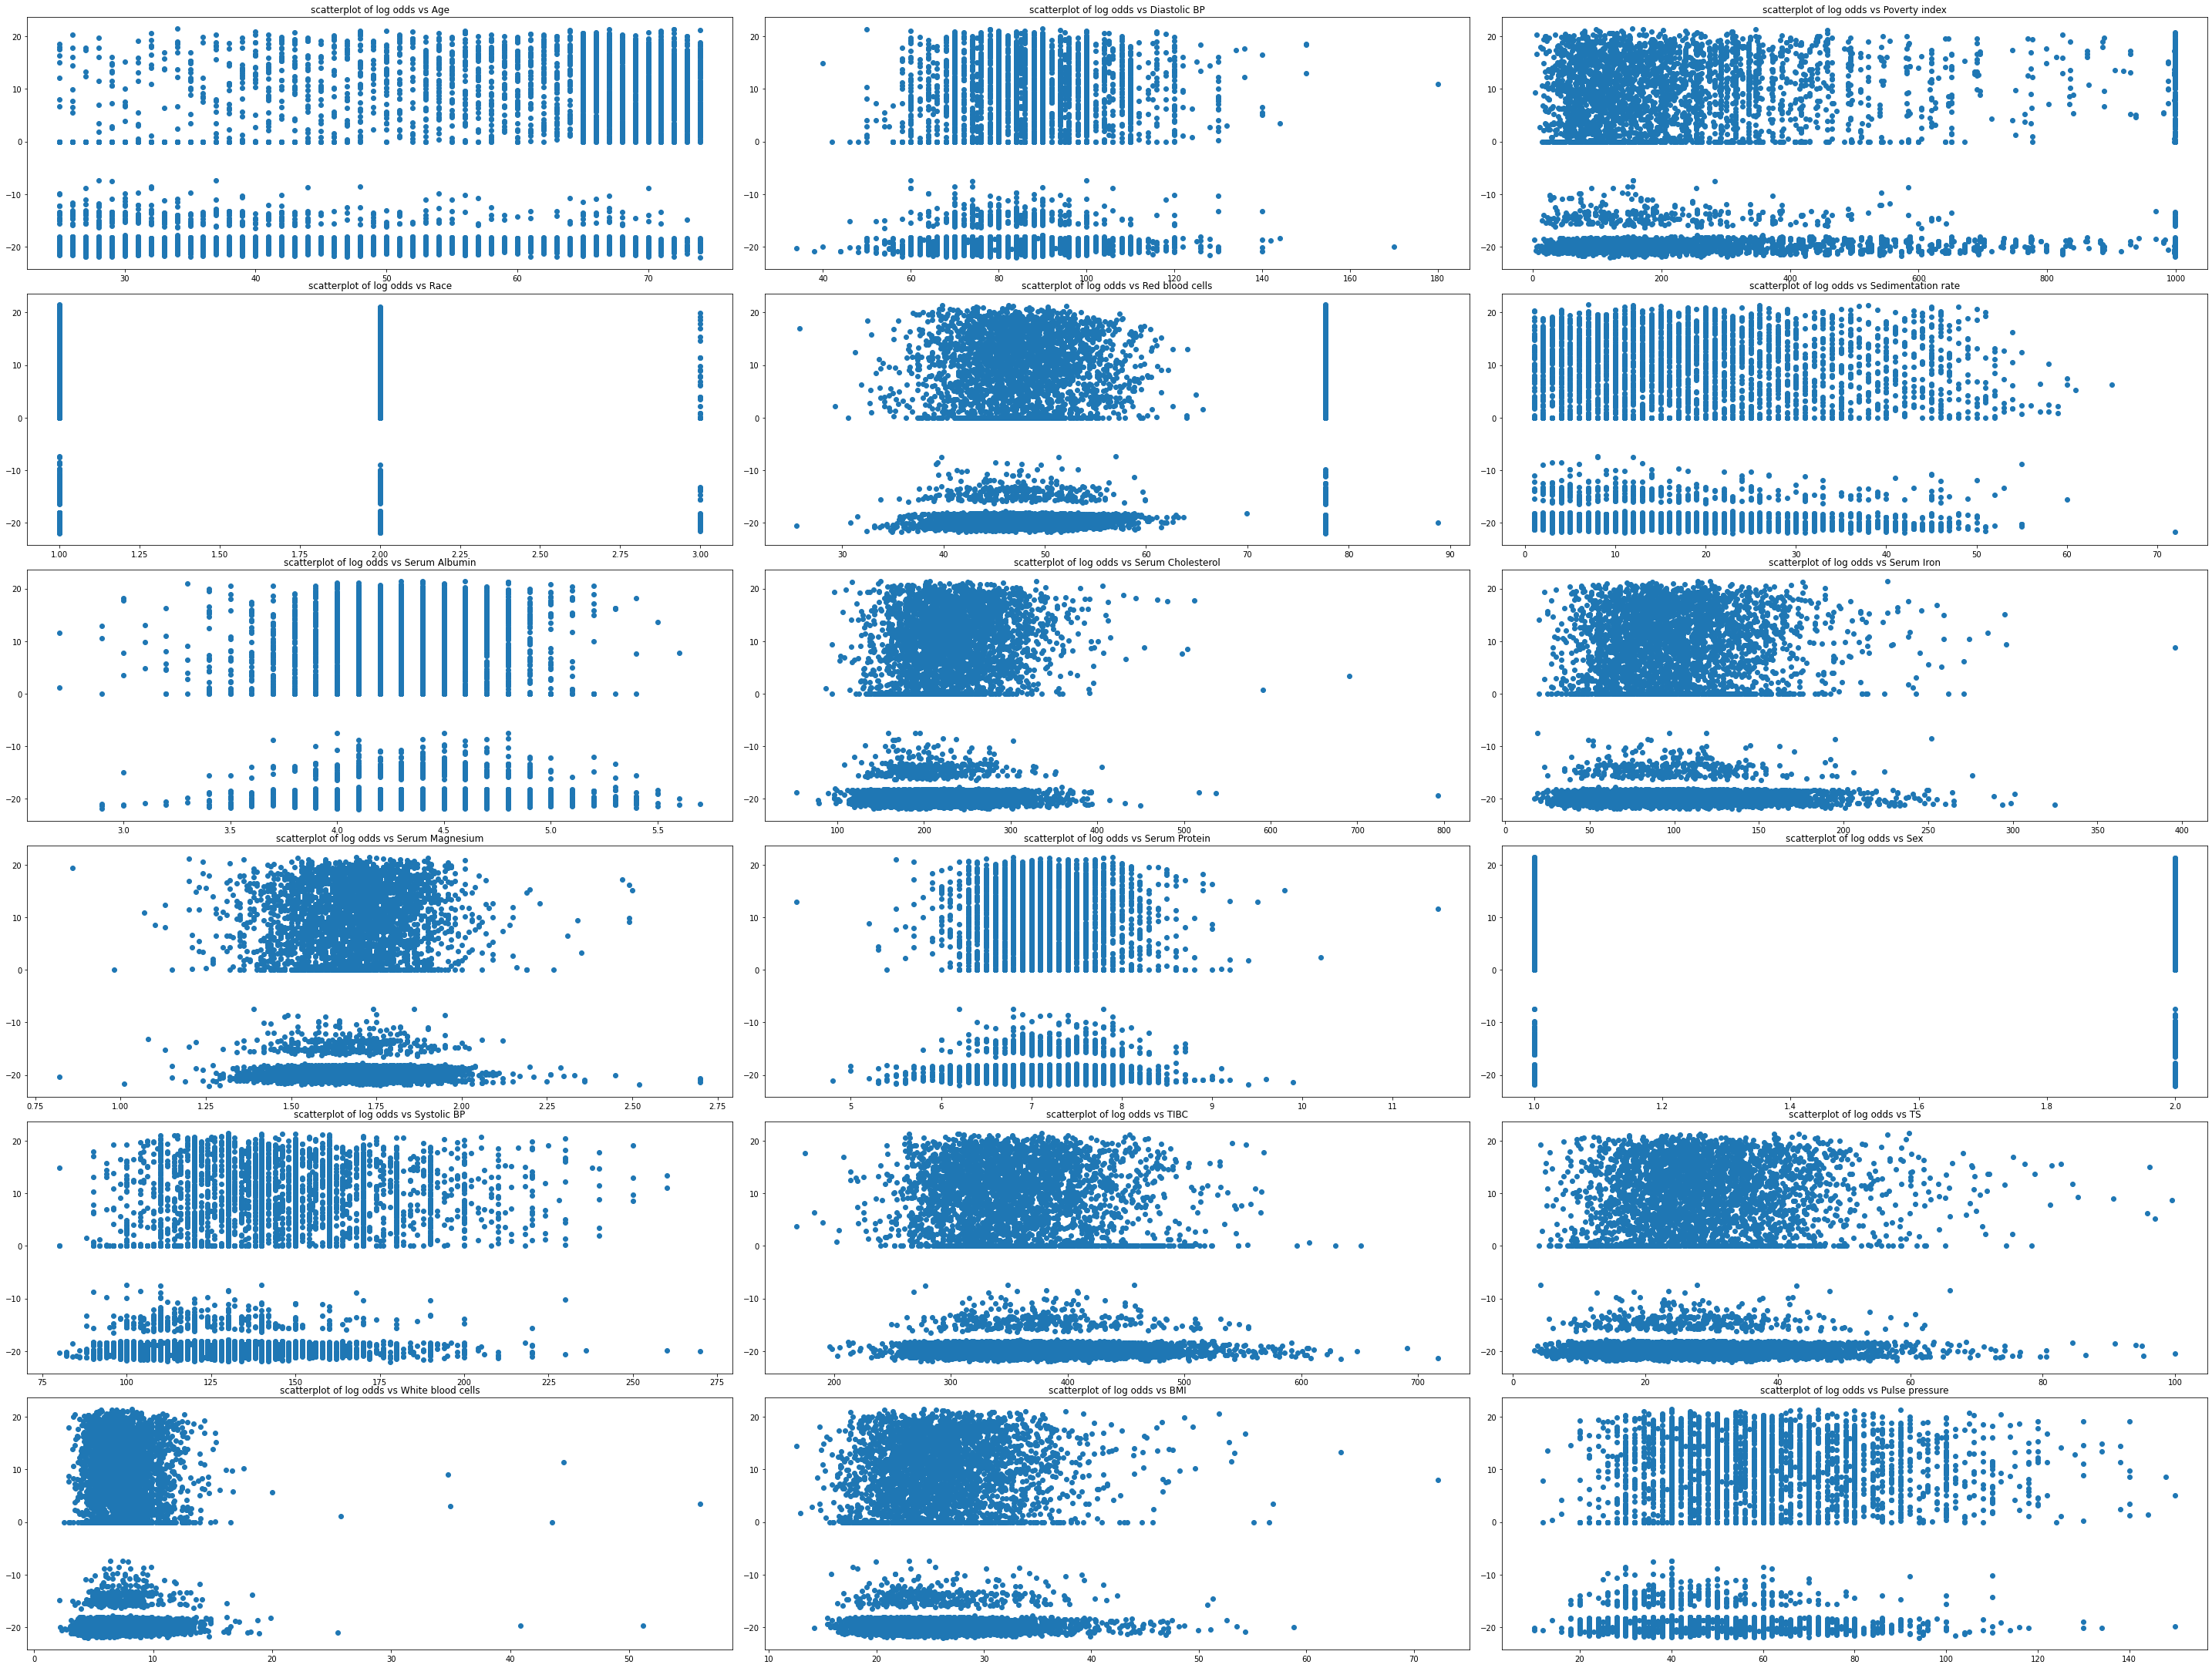

In [24]:
# scatterplots not imputed

fig, axs = plt.subplots(6, 3, figsize=(40,30))
combined_dropped = pd.concat([X_data_dropped, y_data_dropped], axis = 1)
fig.tight_layout()

for i, col in enumerate(X_data_dropped.columns):
    col = X_data_dropped.columns[i]
    axs[i//3, i % 3].scatter(X_data_dropped[col], y_data_dropped)
    axs[i//3, i % 3].set_label(col)
    axs[i//3, i % 3].set_label("log odds")
    axs[i//3, i % 3].set_title("scatterplot of log odds vs " + col)
    # sns.regplot(x=X_data_imputed[col], y=y_data, ax = axs[i])

plt.show()
plt.clf()
plt.close()

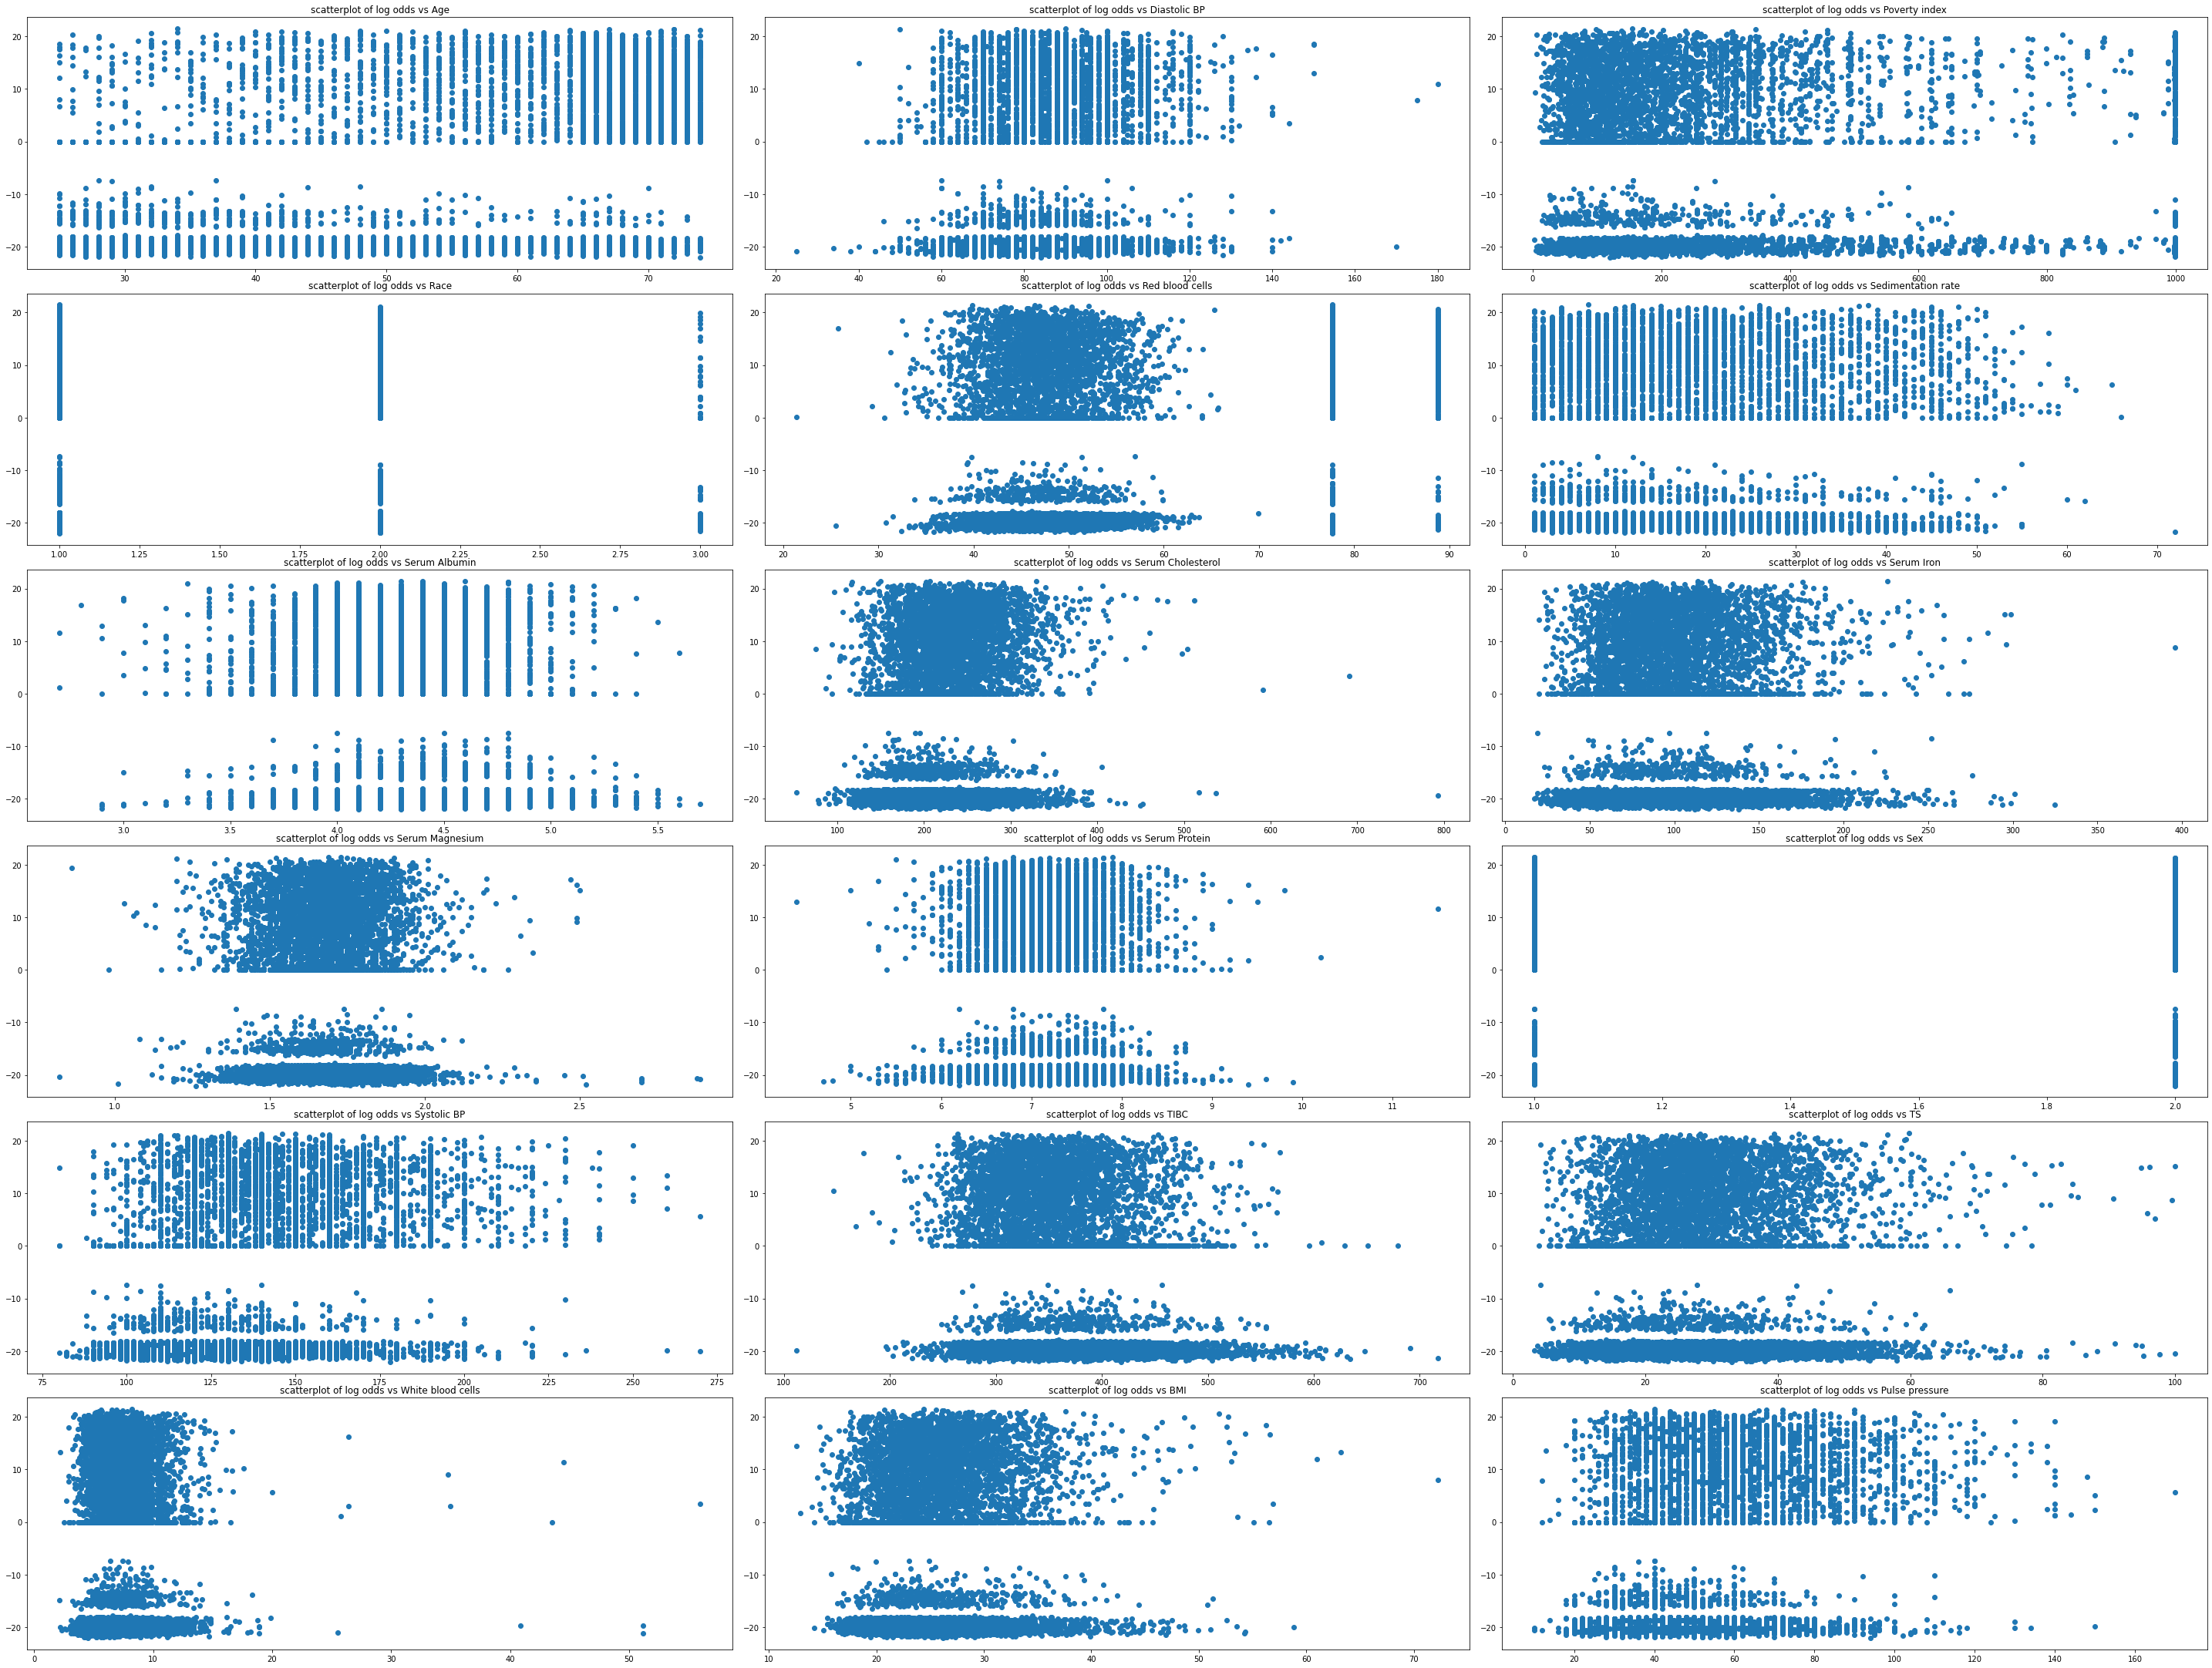

In [11]:
# scatterplots IMPUTED

fig, axs = plt.subplots(6, 3, figsize=(40,30))
combined_imputed = pd.concat([X_data_imputed, y_data], axis = 1)
fig.tight_layout()

for i, col in enumerate(X_data_imputed.columns):
    col = X_data_imputed.columns[i]
    axs[i//3, i % 3].scatter(X_data_imputed[col], y_data)
    axs[i//3, i % 3].set_label(col)
    axs[i//3, i % 3].set_label("log odds")
    axs[i//3, i % 3].set_title("scatterplot of log odds vs " + col)
    # sns.regplot(x=X_data_imputed[col], y=y_data, ax = axs[i])

plt.show()
plt.clf()
plt.close()

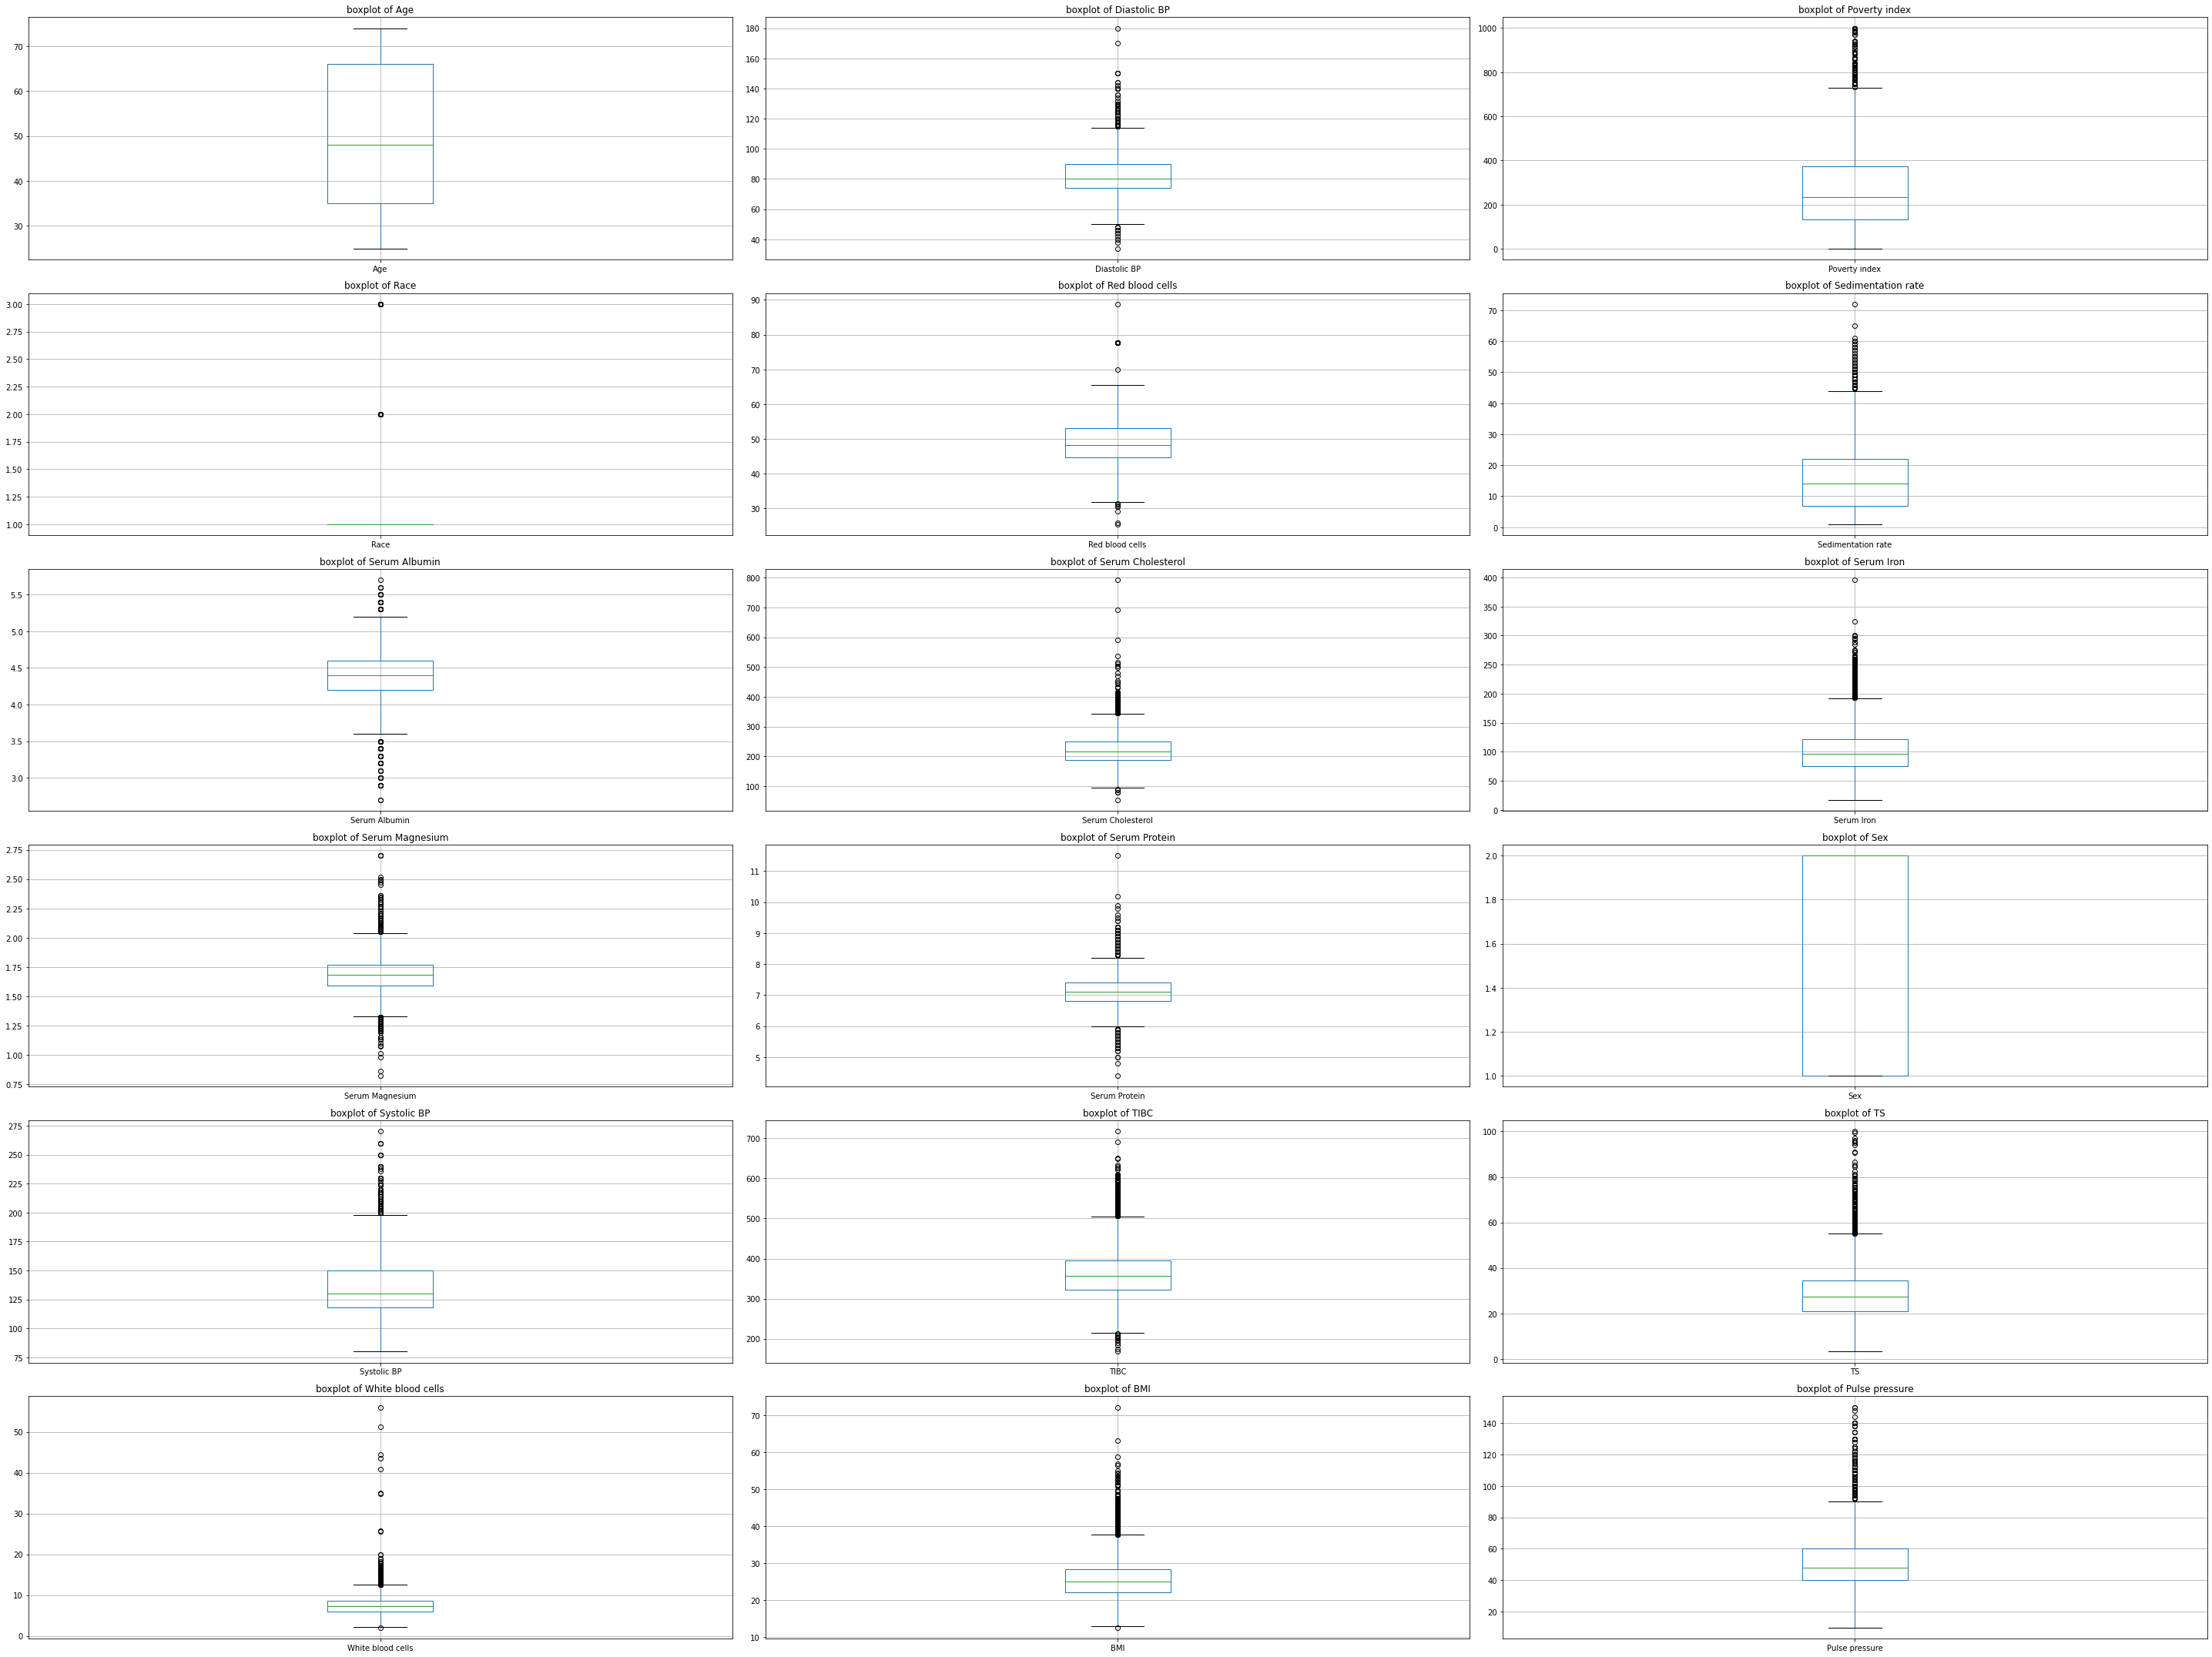

In [12]:
# boxplot for dropped data

fig, axes = plt.subplots(6, 3, figsize = (40, 30))
for i, col in enumerate(X_data_dropped.columns):
    a = X_data_dropped.boxplot(col, ax = axes.flatten()[i])
    axes[i//3, i % 3].set_label(col)
    axes[i//3, i % 3].set_title("boxplot of " + col)
plt.tight_layout()

plt.show()
plt.clf()
plt.close()

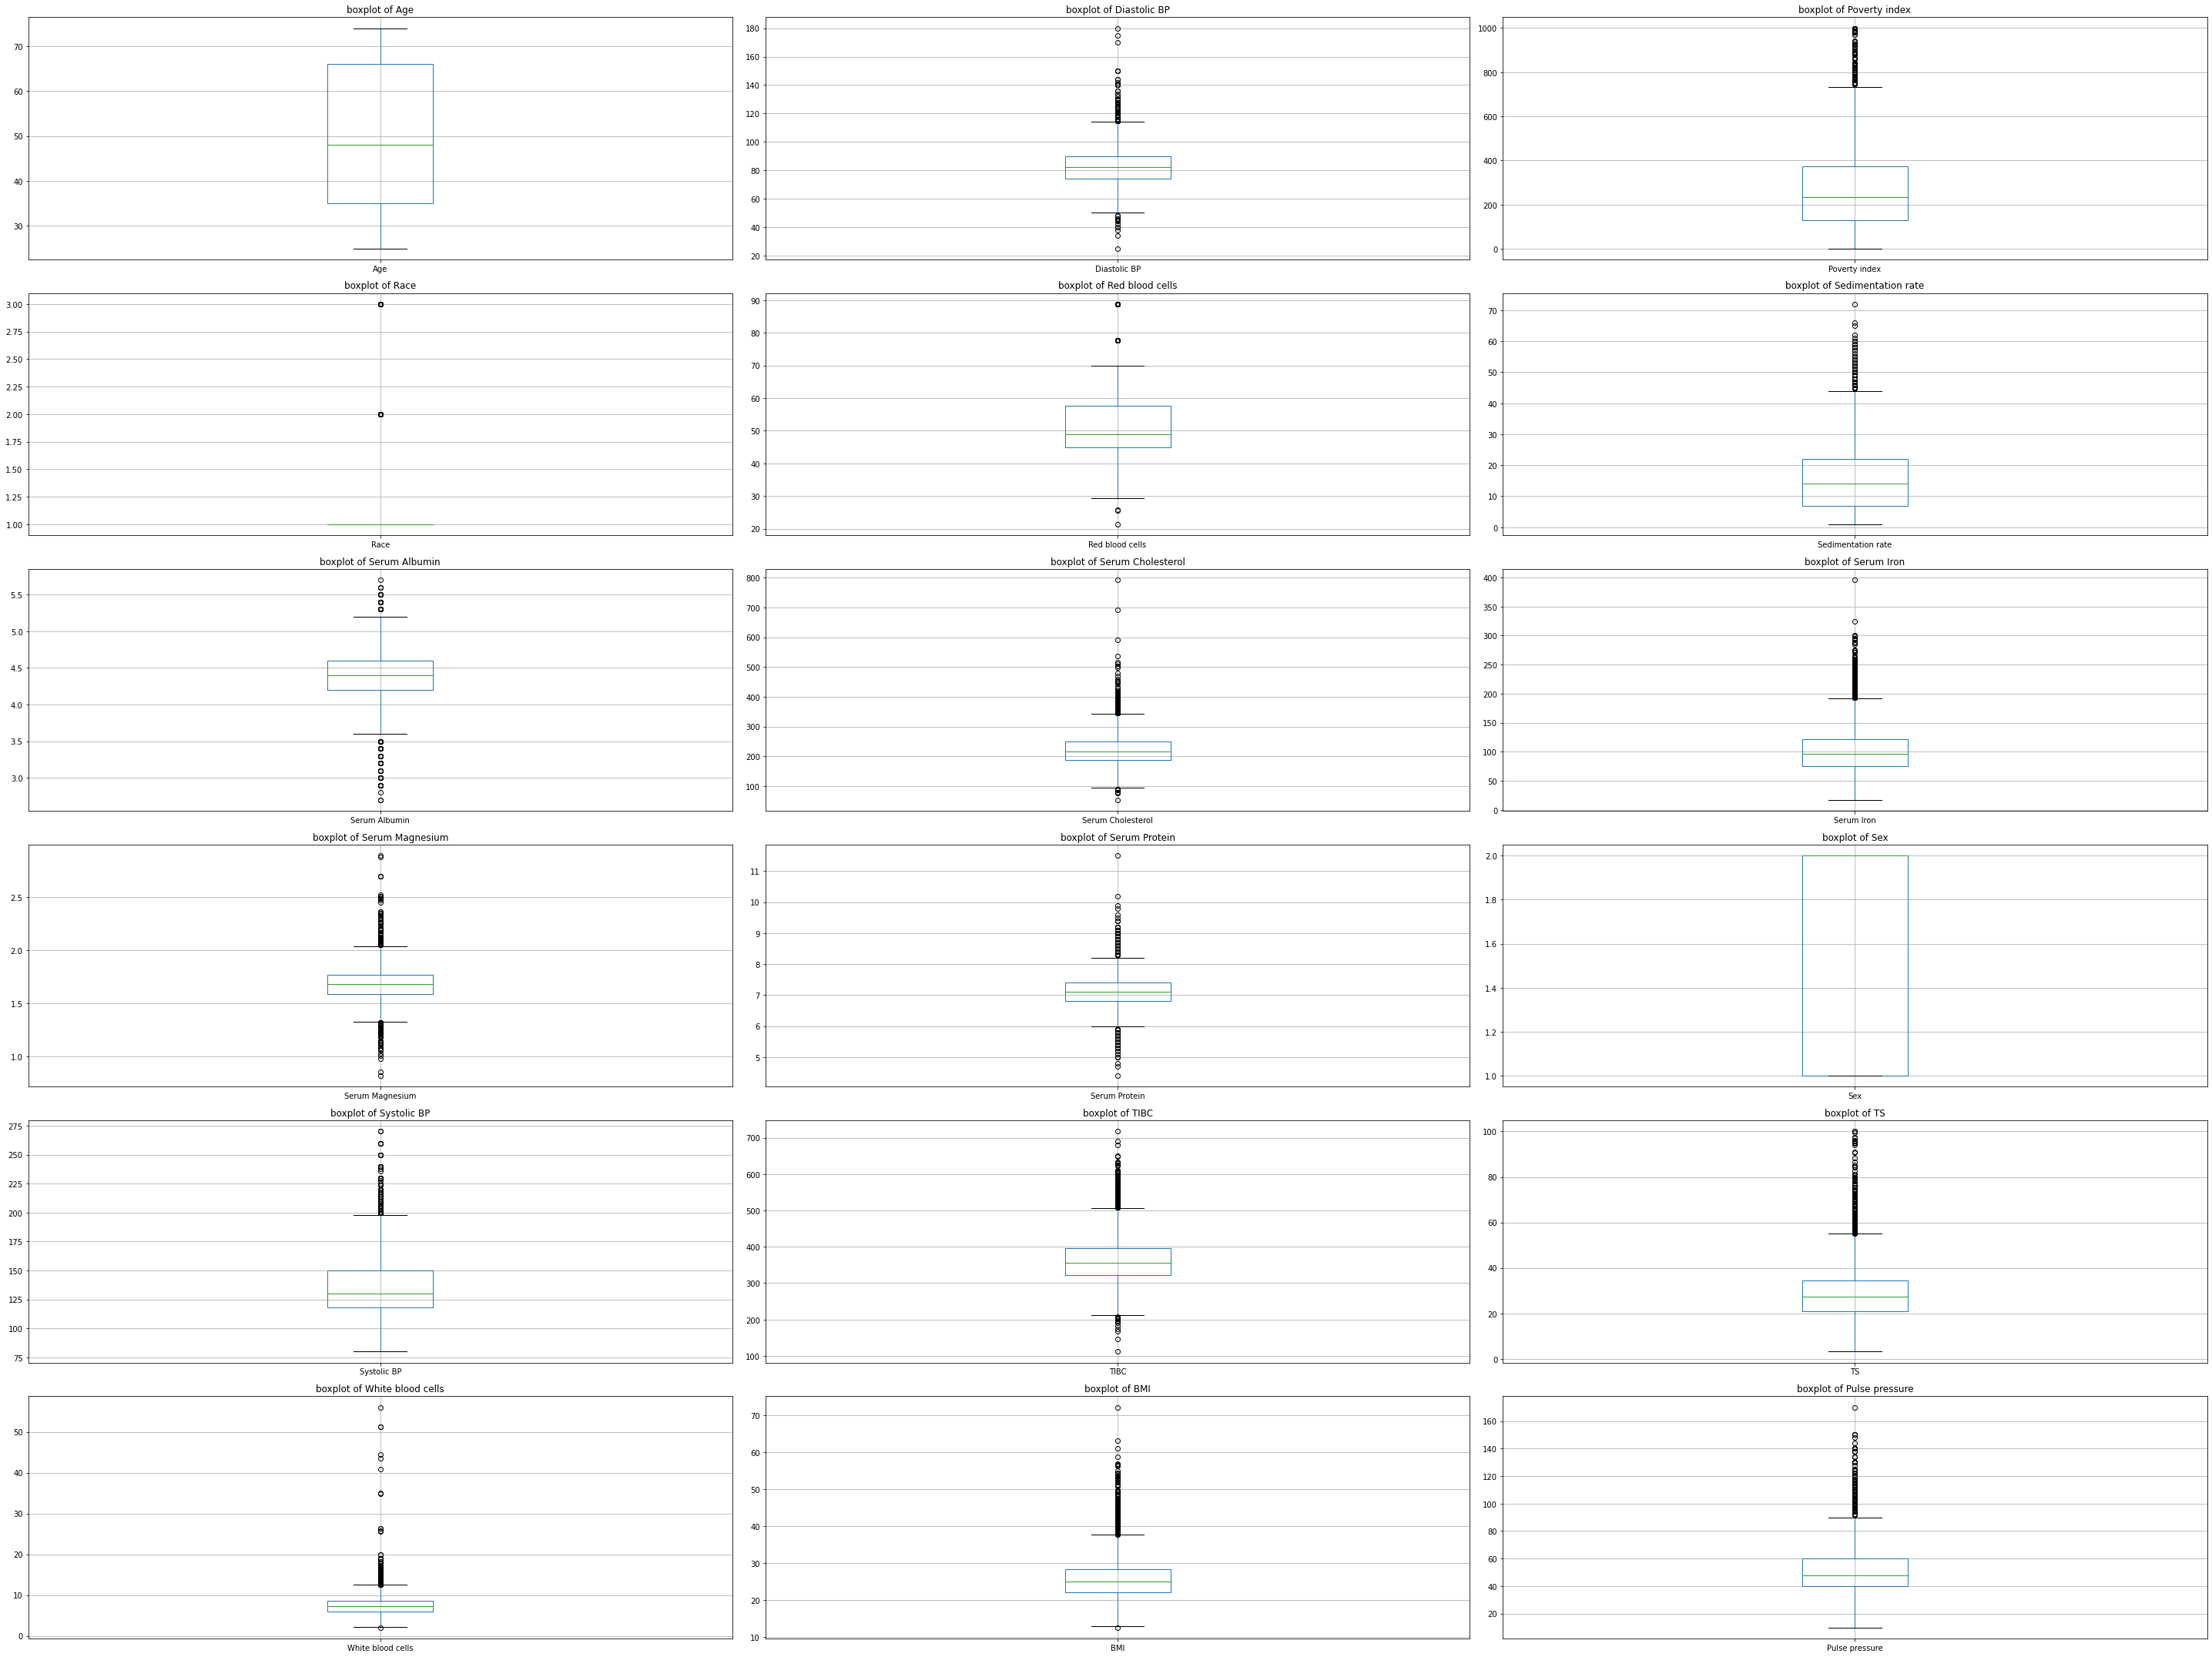

In [13]:
# boxplot for imputed data

fig, axes = plt.subplots(6, 3, figsize = (40, 30))
for i, col in enumerate(X_data_imputed.columns):
    a = X_data_imputed.boxplot(col, ax = axes.flatten()[i])
    axes[i//3, i % 3].set_label(col)
    axes[i//3, i % 3].set_title("boxplot of " + col)
plt.tight_layout()

plt.show()
plt.clf()
plt.close()

In [14]:
#linear regresion, knn imputation, mean imputation, then transform the dataset 

# split beforehand

# baseline with drop model
# 2nd model, with imputation ()



# 